In [1]:
import numpy as np , pandas as pd ,  plotly.express as px

In [13]:
latlong = pd.read_csv('/Users/ddhanushnaik/Documents/career/ML/python 2/project/plotly dashboard/district wise centroids.csv')
ppl = pd.read_csv('/Users/ddhanushnaik/Documents/career/ML/python 2/project/plotly dashboard/india-districts-census-2011.csv')

In [10]:
latlong.isnull().sum()

State        0
District     0
Latitude     0
Longitude    0
dtype: int64

In [12]:
latlong.duplicated().sum()

0

In [14]:
ppl.isnull().sum()

District code                    0
State name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64

In [15]:
ppl.duplicated().sum()

0

In [22]:
col = ['District code','District name','Population','Male','Female','Literate','Male_Literate','Female_Literate','Hindus',
 'Muslims',
 'Christians',
 'Sikhs',
 'Buddhists',
 'Jains',
 'Others_Religions',]

In [25]:
ppl = ppl[col]

In [29]:
final_df = latlong.merge(ppl,left_on='District',right_on='District name').drop(columns='District name')

In [38]:
# sex ratio


final_df['Sex_Ratio']=round((final_df['Male']/final_df['Female'])*1000)

In [41]:
# litercary rate


final_df['Litercay_Rate']=round((final_df['Literate']/final_df['Population'])*100)

In [44]:
final_df.drop(columns=['Male','Female','Literate'],inplace=True)

In [46]:
final_df.to_csv('india.csv',index=False)

In [49]:
list_of_state = list(final_df['State'].unique())

In [50]:
list_of_state.insert(0,'overall india')

In [51]:
list_of_state

['overall india',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Daman and Diu',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Orissa',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttaranchal',
 'West Bengal']

In [57]:
sorted(final_df.columns[5:])

['Buddhists',
 'Christians',
 'Female_Literate',
 'Hindus',
 'Jains',
 'Litercay_Rate',
 'Male_Literate',
 'Muslims',
 'Others_Religions',
 'Population',
 'Sex_Ratio',
 'Sikhs']

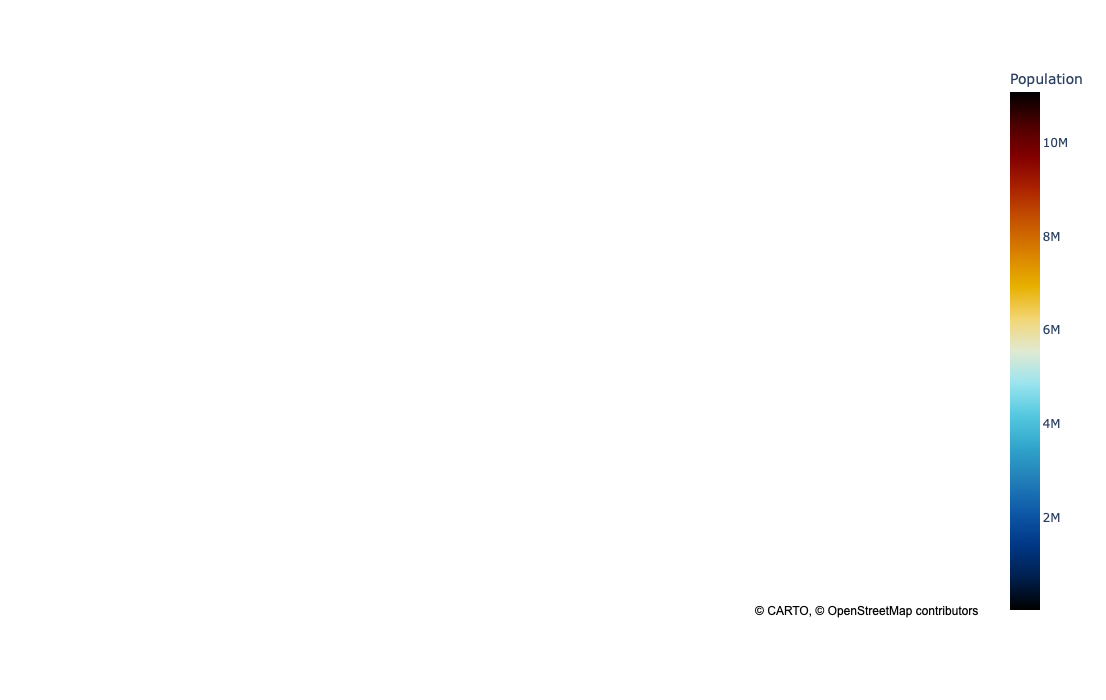

In [66]:
import plotly.express as px
df = px.data.carshare()
fig = px.scatter_map(final_df, lat="Latitude", lon="Longitude",     color="Population", size="Hindus",
                  color_continuous_scale=px.colors.cyclical.IceFire ,zoom=3,width=1000,height=700)
fig.show()

In [58]:
final_df

,State,District,Latitude,Longitude,District code,Population,Male_Literate,Female_Literate,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Others_Religions,Sex_Ratio,Litercay_Rate
0,Andhra Pradesh,Adilabad,19.284514,78.813212,532,2741239,856350,626997,2399901,275970,15422,1377,25510,617,322,999.0,54.0
1,Andhra Pradesh,Anantapur,14.312066,77.460158,553,4081148,1338474,972486,3599372,443456,20463,932,341,1417,309,1024.0,57.0
2,Andhra Pradesh,Chittoor,13.331093,78.927639,554,4174064,1484794,1183084,3737588,397870,24129,867,253,1322,358,1003.0,64.0
3,Andhra Pradesh,East Godavari,16.782718,82.243207,545,5154296,1716933,1571644,4983330,77777,77825,738,413,4149,403,994.0,64.0
4,Andhra Pradesh,Guntur,15.884926,80.586576,548,4887813,1634726,1325715,4217597,559770,89763,764,323,3282,332,997.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,West Bengal,Maldah,25.080268,88.171917,332,3988845,1152019,934413,1914352,2045151,13209,747,359,639,7929,1059.0,52.0
513,West Bengal,Murshidabad,24.259507,88.168169,333,7103807,2177187,1878647,2359061,4707573,18102,766,348,3037,7429,1044.0,57.0
514,West Bengal,Nadia,23.564110,88.582930,336,5167600,1878866,1601689,3728482,1382682,33835,849,514,281,16893,1056.0,67.0
515,West Bengal,Puruliya,23.254192,86.396853,340,2930115,1002058,622847,2373120,227249,8646,622,209,3052,309029,1045.0,55.0


AttributeError: module 'plotly.express' has no attribute 'geo'